In [39]:
import sqlite3
conn = sqlite3.connect('Data/im.db')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [40]:
#Data cleaning
budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
budgets['release_date'] = pd.to_datetime(budgets['release_date'], format='%b %d, %Y')
budgets['production_budget'] = budgets['production_budget'].replace('\$', '', regex=True)
budgets['production_budget'] = budgets['production_budget'].replace(',', '', regex=True)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('\$', '', regex=True)
budgets['domestic_gross'] = budgets['domestic_gross'].replace(',', '', regex=True)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('\$', '', regex=True)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace(',', '', regex=True)
budgets['production_budget'] = budgets['production_budget'].astype('int64')
budgets['domestic_gross'] = budgets['domestic_gross'].astype('int64')
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype('int64')
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [41]:
#Create revenues and ROI column
budgets['revenues'] = budgets['worldwide_gross']-budgets['production_budget']
budgets['ROI'] = budgets['revenues']/budgets['production_budget']
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [42]:
#Confirming there is a correlation between budget and revenues
corr = budgets['production_budget'].corr(budgets['worldwide_gross'])
print ("Correlation between Budget and WWGross is: ", round(corr, 2))

Correlation between Budget and WWGross is:  0.75


In [43]:
#but a very little negative correlation between budget and roi
corr = budgets['production_budget'].corr(budgets['ROI'])
print ("Correlation between Budget and ROI is: ", round(corr, 2))

Correlation between Budget and ROI is:  -0.05


In [44]:
#for this analysis we will focus on the 25% of the movies that generated more profits
mayor_profits = budgets.loc[budgets['ROI'] > (budgets['ROI'].quantile(.75))]
mayor_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
...,...,...,...,...,...,...,...,...
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,2004-10-08,Primer,7000,424760,841926,834926,119.275143
5775,76,2006-05-26,Cavite,7000,70071,71644,64644,9.234857
5778,79,1999-04-02,Following,6000,48482,240495,234495,39.082500


<ipython-input-45-0813adb125e5>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


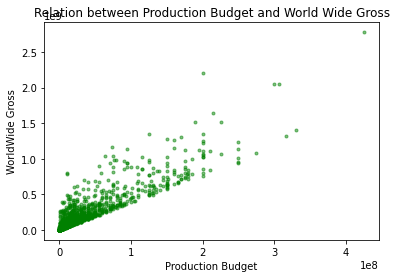

In [45]:
#relation between Budget and WWGross
x= mayor_profits['production_budget'] 
y = mayor_profits['worldwide_gross']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '.', color = 'green', alpha=0.5)
ax.set_title('Relation between Production Budget and World Wide Gross')
ax.set_ylabel('WorldWide Gross')
ax.set_xlabel('Production Budget')
fig.show();

<ipython-input-46-70ee66d1fd00>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


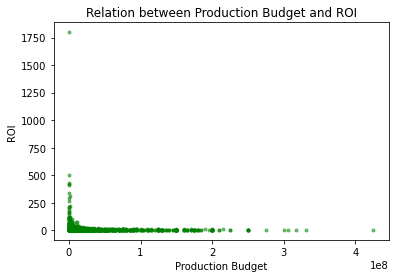

In [46]:
#Relation between budget and ROI
x= mayor_profits['production_budget'] 
y = mayor_profits['ROI']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = '.', color = 'green', alpha=0.5)
ax.set_title('Relation between Production Budget and ROI')
ax.set_ylabel('ROI')
ax.set_xlabel('Production Budget')
fig.show();

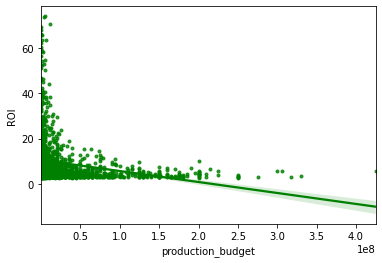

In [47]:
#Without the last 2.5%
clean_mayor_profits = mayor_profits.drop(mayor_profits[mayor_profits['ROI'] > mayor_profits['ROI'].quantile(.975)].index)
sns.regplot(x=clean_mayor_profits['production_budget'], y=clean_mayor_profits['ROI'], color = 'green', marker = '.');

In [48]:
clean_mayor_profits['production_budget'].describe()

count    1.409000e+03
mean     3.274963e+07
std      4.879021e+07
min      6.000000e+03
25%      4.300000e+06
50%      1.400000e+07
75%      3.800000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [1]:
plt.hist(clean_mayor_profits['production_budget'], bins='auto');

NameError: name 'plt' is not defined

In [50]:
clean_mayor_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
...,...,...,...,...,...,...,...,...
5765,66,2001-03-09,Dayereh,10000,673780,673780,663780,66.378000
5766,67,2006-04-28,Clean,10000,138711,138711,128711,12.871100
5767,68,2001-07-06,Cure,10000,94596,94596,84596,8.459600
5775,76,2006-05-26,Cavite,7000,70071,71644,64644,9.234857


In [51]:
most_voted_movies = pd.read_sql("""
WITH popular_movies 
AS
(
SELECT 
       p.primary_name, b.primary_title, r.numvotes, 
       r.averagerating, b.genres
FROM 
       movie_basics as b
INNER JOIN 
       movie_ratings as r
ON 
       b.movie_id = r.movie_id
INNER JOIN 
       directors as d
ON
       r.movie_id = d.movie_id
INNER JOIN 
       persons as p
ON
       d.person_id = p.person_id

GROUP BY primary_title

ORDER BY r.numvotes DESC

LIMIT 1500
)

SELECT 
         primary_title as 'Title',primary_name as 'Director', averagerating as 'Average Rating', 
         numvotes as 'Num. of Votes', genres as 'Genres'
FROM
    popular_movies

ORDER BY 
    numvotes DESC;


""", conn)

In [52]:
most_voted_movies

,Title,Director,Average Rating,Num. of Votes,Genres
0,Inception,Christopher Nolan,8.8,1841066,"Action,Adventure,Sci-Fi"
1,The Dark Knight Rises,Christopher Nolan,8.4,1387769,"Action,Thriller"
2,Interstellar,Christopher Nolan,8.6,1299334,"Adventure,Drama,Sci-Fi"
3,Django Unchained,Quentin Tarantino,8.4,1211405,"Drama,Western"
4,The Avengers,Joss Whedon,8.1,1183655,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
1495,Talvar,Meghna Gulzar,8.2,25443,"Crime,Drama,Mystery"
1496,Z for Zachariah,Craig Zobel,6.0,25429,"Drama,Sci-Fi,Thriller"
1497,Weekend,Andrew Haigh,7.6,25424,"Drama,Romance"
1498,Palo Alto,Gia Coppola,6.2,25402,Drama


In [53]:
most_voted_movies['Title'] = most_voted_movies['Title'].str.lower()

In [54]:
clean_mayor_profits['movie'] = clean_mayor_profits['movie'].str.lower()
clean_mayor_profits.rename(columns = {'movie':'Title', 'id': 'ID', 'production_budget': 'Budget', 'revenues':'Revenues'}, inplace = True)

In [55]:
merged_profits_votes = clean_mayor_profits.merge(most_voted_movies, on = 'Title', how = 'left')

In [56]:
merged_profits_votes.head()

,ID,release_date,Title,Budget,domestic_gross,worldwide_gross,Revenues,ROI,Director,Average Rating,Num. of Votes,Genres
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,5.532577,NaN,NaN,NaN,NaN
1,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,3.243841,Joss Whedon,7.3,665594.0,"Action,Adventure,Sci-Fi"
2,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747,999721747,3.153696,NaN,NaN,NaN,NaN
3,6,2015-12-18,star wars ep. vii: the force awakens,306000000,936662225,2053311220,1747311220,5.710167,NaN,NaN,NaN,NaN
4,7,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,1748134200,5.827114,Anthony Russo,8.5,670926.0,"Action,Adventure,Sci-Fi"


In [57]:
merged_profits_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1408
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               1409 non-null   int64         
 1   release_date     1409 non-null   datetime64[ns]
 2   Title            1409 non-null   object        
 3   Budget           1409 non-null   int64         
 4   domestic_gross   1409 non-null   int64         
 5   worldwide_gross  1409 non-null   int64         
 6   Revenues         1409 non-null   int64         
 7   ROI              1409 non-null   float64       
 8   Director         382 non-null    object        
 9   Average Rating   382 non-null    float64       
 10  Num. of Votes    382 non-null    float64       
 11  Genres           382 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 143.1+ KB
